# Projecto SIM

## Identificação dos alunos

Francisco Silva, a21705328

Rodrigo Cassanheira, a21703091

### Bibliotecas necessárias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### Exercício 1

url do dataset

In [4]:
url = "https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/wine_q.csv"

### Exercício 2

Carregar o dataset num Panda dataframe

In [5]:
df = pd.read_csv(url, error_bad_lines=False)

Tamanho do dataframe

In [6]:
df.size

47532

Mostra as 5 primeiras linhas do dataframe

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


### Exercício 3

Remover possiveis linhas duplicadas e mostrar as 5 primeiras linhas

In [8]:
df.drop_duplicates().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


Tamanho do dataframe sem os duplicados

In [9]:
df.size

47532

### Exercício 4

[None, None, None, None, None, None, None, None, None, None, None, None]

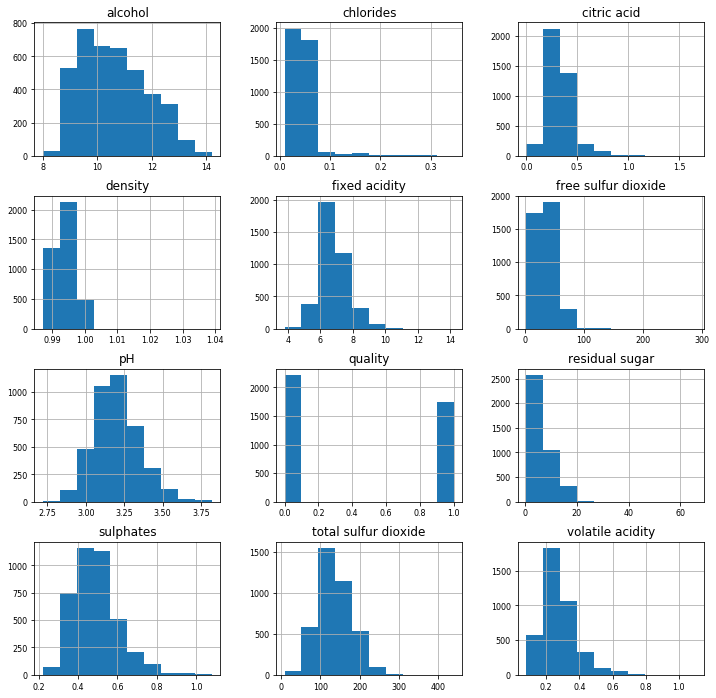

In [10]:
[x.title.set_size(12) for x in df.hist(figsize=(12, 12), xlabelsize=8, ylabelsize=8).ravel()]

#### A distribuição da quality é claramente uma binomial. As outra distribuições não são possiveis de dizer se são ou não normais por inspeção visual.

### Exercício 5

In [11]:
pd.DataFrame(dict([(col, list(stats.jarque_bera(df[col]))) for col in df.columns])).transpose().rename(columns={0: 'jb_value', 1: 'p_value'})

,jb_value,p_value
fixed acidity,1154.195925,0.0
volatile acidity,6446.805928,0.0
citric acid,8842.606940,0.0
residual sugar,6484.481708,0.0
chlorides,224093.909649,0.0
free sulfur dioxide,31322.882465,0.0
total sulfur dioxide,226.280458,0.0
density,34186.932009,0.0
pH,186.359095,0.0
sulphates,982.656647,0.0


### Exercício 6

Heatmap com gradiente de cor vermelho e azul para ser mais fácil a análise da matriz de correlação

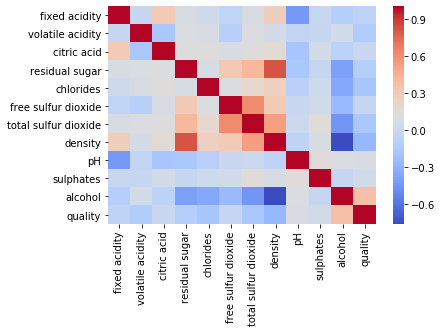

In [25]:
sns.heatmap(df.corr(), cmap="coolwarm")

### Exercício 7

De acordo com o p-value do Exercício 5 conclui-se que as diferentes dimensões do dataset têm o p-value igual a zero, então é possível usar PCA para analisar os dados.

Após fazer uma análise visual sobre o heatmap da matriz de correlação do Exercício 6 conclui-se que se pode usar PCA para analisar os dados. As diferentes dimensões não estão diretamente correlacionadas entre si e as que se relacionam mais são apenas density e residual sugar, logo a perda de dados é muito reduzida.

### Exercício 8

#### Separação das variáveis do dataframe

Variáveis independentes (onze primeiras)

In [37]:
independent_variables = df.iloc[:, :-1].values

Variável dependente (quality)

In [39]:
dependent_variable = df.iloc[:, -1].values

### Exercício 9

Normalização dos dados

In [40]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(independent_variables)

#### Aplicação do PCA

Eigenvalue

In [66]:
pca_norm = PCA(n_components=11)
pca_norm.fit(df_norm)
eigenvalues = pca_norm.explained_variance_ratio_
pd.DataFrame(eigen_values, index=[f"PC{i + 1}" for i in range(len(eigenvalues))], columns=["eigenvalue"]).transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
eigenvalue,0.289412,0.145133,0.110277,0.094459,0.089194,0.084482,0.065641,0.054731,0.038985,0.025537,0.00215


In [17]:
norm_pca_loadings = pd.DataFrame(pca_norm.components_.transpose(), index = df.columns[:-1], columns=[f"PC{i}" for i in range(1, df.shape[1])])
norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.152835,-0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,0.136228,-0.179780
volatile acidity,0.026771,0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,0.233361,-0.019625
citric acid,0.151911,-0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,0.050317,-0.010951
residual sugar,0.422095,0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,-0.072347,-0.486911
chlorides,0.211968,-0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,-0.052923,-0.026149
free sulfur dioxide,0.308153,0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,0.575552,0.031692
total sulfur dioxide,0.416806,0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,-0.711630,-0.032872
density,0.512038,0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,0.074948,0.755219
pH,-0.114020,0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,0.123225,-0.146379
sulphates,0.047439,0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,0.070471,-0.043031


In [72]:
var_cumsum = np.cumsum(eigenvalues)
pd.DataFrame(var_cumsum, index=[if i == 0 row = "PC1" else f"{row} + PC{i + 1}" for i in range(len(eigenvalues))])

SyntaxError: invalid syntax (<ipython-input-72-d16d5e5b40ea>, line 2)

In [19]:
np.argwhere(var_cumsum > 0.88)[0]

array([7])